In [3]:
import numpy as np
import sympy as smp
from sympy import Matrix

import scipy as sp

import qiskit
from qiskit import __version__
print(__version__)
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate   


2.1.2


Quantum Teleportation

In [6]:
qubit = QuantumRegister(1, "Q")
ebit_0 = QuantumRegister(1, "A")
ebit_1 = QuantumRegister(1, "B")

a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

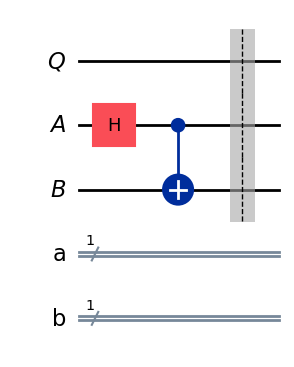

In [8]:
teleportation_protocol = QuantumCircuit(qubit, ebit_0, ebit_1, a, b)

# entangle ebit for teleportation
teleportation_protocol.h(ebit_0)
teleportation_protocol.cx(ebit_0, ebit_1)
teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')


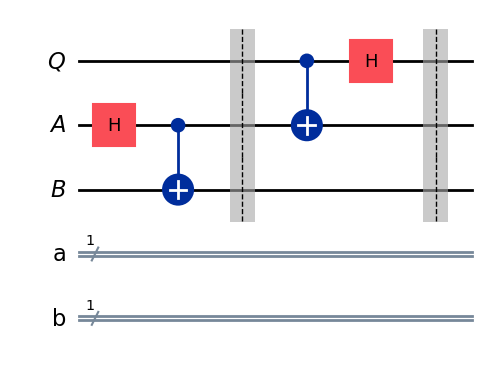

In [9]:
# Alice's Operations

teleportation_protocol.cx(qubit, ebit_0)
teleportation_protocol.h(qubit)
teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')

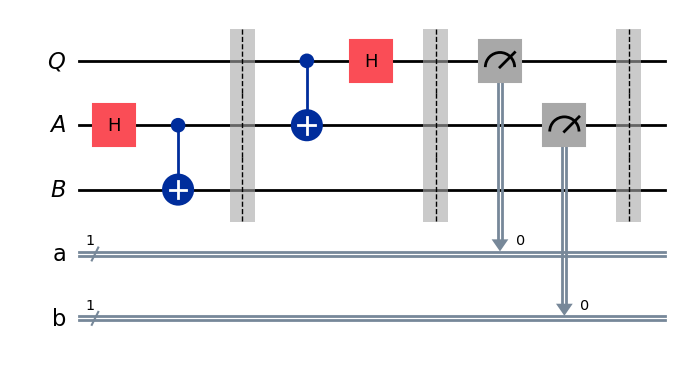

In [10]:
teleportation_protocol.measure(qubit, a)
teleportation_protocol.measure(ebit_0, b)

teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')

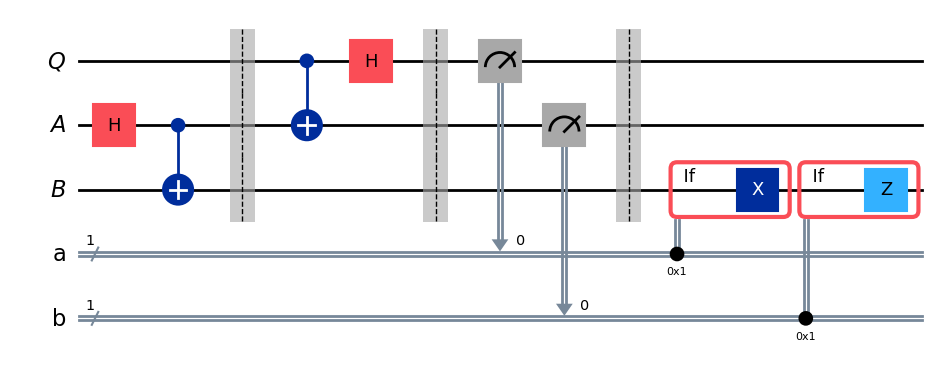

In [11]:
with teleportation_protocol.if_test((a, 1)):
    teleportation_protocol.x(ebit_1)
with teleportation_protocol.if_test((b, 1)):
    teleportation_protocol.z(ebit_1)

teleportation_protocol.draw('mpl')